In [3]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


from dataset import *

## DataSet

0 (256, 256, 3) [ 50  49 208 235] 0
1 (256, 256, 3) [119  48 136 234] 0
2 (256, 256, 3) [ 50  42 213 240] 0
3 (256, 256, 3) [ 82  30 162 129] 0


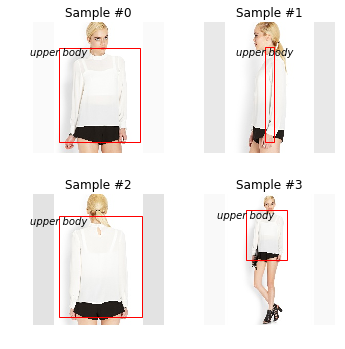

In [4]:
df_dataset = DeepFashionDataset(txt_file='list_bbox_inshop.txt',
                                    root_dir='./DeepFashion/In-shop Clothes Retrieval Benchmark/')

fig = plt.figure(figsize=[5, 5])

for i in range(len(df_dataset)):
    sample = df_dataset[i]

    print(i, sample['image'].shape, sample['bbox'], sample['type'])

    ax = plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_bbox(**sample)

    if i == 3:
        plt.show()
        break

## DataTransform

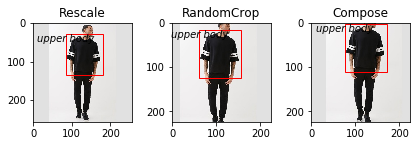

In [5]:
scale = Rescale(256)
crop = RandomCrop(224)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = df_dataset[32]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_bbox(**transformed_sample)

plt.show()

In [6]:
transformed_dataset = DeepFashionDataset(txt_file='list_bbox_inshop.txt',
                                    root_dir='./DeepFashion/In-shop Clothes Retrieval Benchmark/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['bbox'], sample['type'])

    if i == 3:
        break

0 torch.Size([3, 224, 224]) tensor([ 32,  27, 190, 213], dtype=torch.int32) 0
1 torch.Size([3, 224, 224]) tensor([ 97,  27, 114, 213], dtype=torch.int32) 0
2 torch.Size([3, 224, 224]) tensor([ 30,  42, 193, 223], dtype=torch.int32) 0
3 torch.Size([3, 224, 224]) tensor([ 71,  15, 151, 114], dtype=torch.int32) 0


## DataBatch

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 4])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 4])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 4])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 4])
tensor([ 43,  27, 189, 184], dtype=torch.int32)
tensor([  0,   0, 223, 223], dtype=torch.int32)
tensor([  0,   0, 223, 223], dtype=torch.int32)
tensor([ 52,  13, 167, 223], dtype=torch.int32)


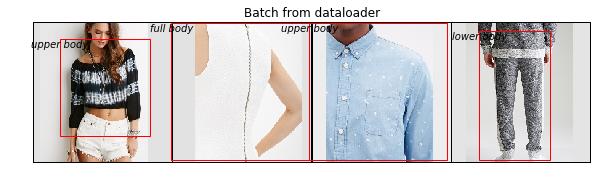

In [7]:
dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True)


# Helper function to show a batch
def show_bbox_batch(sample_batched):
    """Show image with bbox for a batch of samples."""
    images_batch, bbox_batch, type_batch = \
            sample_batched['image'], sample_batched['bbox'], sample_batched['type']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    
    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    
    for i in range(batch_size):
        bbox = bbox_batch[i]
        print(bbox)
        plt.gca().add_patch(plt.Rectangle((bbox[0]+ i * im_size, bbox[1]), bbox[2] - bbox[0],bbox[3] - bbox[1],  fill=False, edgecolor='r', linewidth=1))
        plt.text(bbox[0] + i * im_size, bbox[1], type_name[type_batch[i]], fontsize=10, style='oblique', ha='center',va='top',wrap=True)
        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['bbox'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure(figsize=[10, 10])
        show_bbox_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break